# K-Armed Bandits
#### Kevin Putra Santoso - Avalon AI
The idea of Reinforcement Learning started with the concept of K-armed Bandits. What sets Reinforcement Learning apart from other learning methods is that it uses training process information and evaluates the actions taken rather than giving specific commands to get the "right" result. For example, you are given k choices or actions. Each action you take will give you a reward value, and when you do it multiple times with different actions, you will get a probability distribution of rewards based on the action you chose. Your goal is to maximize the total reward in a given time interval.

Through this notebook, I will cover the idea of K-Armed Bandits Problem through practice. By the end of this notebook, I hope you can gain more intuition on the basic of how reinforcement learning algorithms will work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Suppose I am surrounded with 9 restaurants and I don't know which one should I choose to have lunch. If I would like to find which restaurant can satisfy me the most by trying every dish on their menu randomly, I will know which restaurant gives the most delicious menu as I keep spending my time randomly tasting every menu from different restaurants (but still assuming that at least one bad dish will always exists in every restaurant). But of course, I will not have that much money to try tasting every menu in every restaurant. I only have two choices:

1. **Exploitation**: If I found one restaurant that suits my taste enough, I will keep going to that restaurant every time. This action will save me money, but it might not be able to satisfy me completely since I am sure that there must be a better restaurant out there somewhere. 
2. **Exploration**: If I already found one restaurant that suits my taste enough but I still want to look for a better restaurant, I will keep searching for a better restaurant. This action will cost me more, but I might be able to find the restaurant that suits my taste the most.

These 2 points are often called "The Dilemma of Exploration-exploitation" where each point's statement is contrary. Of course, I want to find the best restaurant with low cost as possible. Instead of using one of the options, I will keep going to a restaurant that will satisfy my taste in the meantime, but I will try to search for a better restaurant occasionally. This is basic the idea of the $\varepsilon$-greedy algorithm. By picking a small number of $\varepsilon$ that indicates the probability of doing exploration, an agent can keep exploring without worrying about losing too much. Another idea is to set a large number of epsilon in the beginning so that the agent explores more and slightly changes it into a smaller number each timestep.

Now let's build a function that generates a random reward for each action taken.

In [21]:
def generate_env_reward():
    reward_act1 = np.random.rand(8) + 2.1
    reward_act2 = np.random.rand(8) + 2.8
    reward_act3 = np.random.rand(8) + 2.4
    reward_act4 = np.random.rand(8) + 3.5
    reward_act5 = np.random.rand(8) + 3.4
    reward_act6 = np.random.rand(8) + 2.8
    reward_act7 = np.random.rand(8) + 2.5
    reward_act8 = np.random.rand(8) + 2.6
    reward_act9 = np.random.rand(8) + 2.2

    env_reward = [reward_act1[np.random.randint(8)], 
                reward_act2[np.random.randint(8)], 
                reward_act3[np.random.randint(8)], 
                reward_act4[np.random.randint(8)], 
                reward_act5[np.random.randint(8)],
                reward_act6[np.random.randint(8)],
                reward_act7[np.random.randint(8)],
                reward_act8[np.random.randint(8)],
                reward_act9[np.random.randint(8)]]
    
    return env_reward

In the K-Armed Bandits problem, an estimated reward is the expected reward of the agent will gain when doing action a. It is defined as follows:

$$
q_*(a)=\mathbb{E}[R_t|A_t=a]
$$

If we expand it more, it is simply just telling us that the estimated reward is not other than the cummulative mean of reward gained by the agent. 

$$
q_*(a) = \frac{1}{n}\sum_{i=1}^{n}R_i
$$

When the agent do the greedy action, it will choose the action that can return highest estimated reward on that timestep. It is defined as follows.

$$
A_t = argmax_{a}{Q_t(a)}
$$

And so, the epsilon-greedy algorithm is mathematically defined as follows.

$$
A_t=\begin{cases}
    \text{random}(a_1, a_2, ..., a_n)\text{ with } \varepsilon \text{ probability} \\
    argmax_{a}{Q_t(a)}\text{ with } 1-\varepsilon \text{ probability}
    \end{cases}
$$

Now let's get into practice. I will build a class to represent the agent. The agent class contains 2 parameters: timestep and epsilon

In [22]:
def Q_value(N, Q, Reward):
    return Q + 1 / N * (Reward - Q)

class Agent:
    def __init__(self, timestep, epsilon):
        self.timestep = timestep
        self.epsilon = epsilon
    
    def start(self):
        Q = [0] * 9
        N = [0] * 9
        rewards_arr = []

        choice_arr = np.random.choice(2, self.timestep, p=[self.epsilon, 1 - self.epsilon])
        
        for choice_act_exploit in choice_arr:
            env_reward = generate_env_reward()
            if (N == [0, 0, 0, 0, 0]):
                action_taken = np.random.randint(9)
                Q[action_taken] = env_reward[action_taken]
                N[action_taken] += 1
                rewards_arr.append(env_reward[action_taken])
                continue

            if (choice_act_exploit):
                action_taken = np.argmax(Q)
                N[action_taken] += 1
                Q[action_taken] = Q_value(N[action_taken], Q[action_taken], env_reward[action_taken])
                rewards_arr.append(env_reward[action_taken])
                
            else:
                action_taken = np.random.randint(9)
                N[action_taken] += 1
                Q[action_taken] = Q_value(N[action_taken], Q[action_taken], env_reward[action_taken])
                rewards_arr.append(env_reward[action_taken])
                
        return rewards_arr

Now that the class has been built, let's prepare a list to store a collection of agents. I will set the timestep into 2000 step and using 50 agents for each run. After that, I will store every data in a 100x2000 dataframe where each column represents the timestep.  Finally, I will calculate the mean reward for each columns and plot it.

In [23]:
agents1 = []
agents2 = []
agents3 = []
agents4 = []
agents5 = []
timestep = 2000
for i in range(100):
    agents1.append(Agent(timestep=timestep, epsilon=0).start())
    agents2.append(Agent(timestep=timestep, epsilon=0.01).start())
    agents3.append(Agent(timestep=timestep, epsilon=0.03).start())
    agents4.append(Agent(timestep=timestep, epsilon=0.1).start())
    agents5.append(Agent(timestep=timestep, epsilon=0.4).start())

In [24]:
trials1 = pd.DataFrame(agents1)
trials2 = pd.DataFrame(agents2)
trials3 = pd.DataFrame(agents3)
trials4 = pd.DataFrame(agents4)
trials5 = pd.DataFrame(agents5)

trial_mean1 = []
trial_mean2 = []
trial_mean3 = []
trial_mean4 = []
trial_mean5 = []

for col in trials1.columns:
    trial_mean1.append(np.mean(trials1[col]))
    trial_mean2.append(np.mean(trials2[col]))
    trial_mean3.append(np.mean(trials3[col]))
    trial_mean4.append(np.mean(trials4[col]))
    trial_mean5.append(np.mean(trials5[col]))

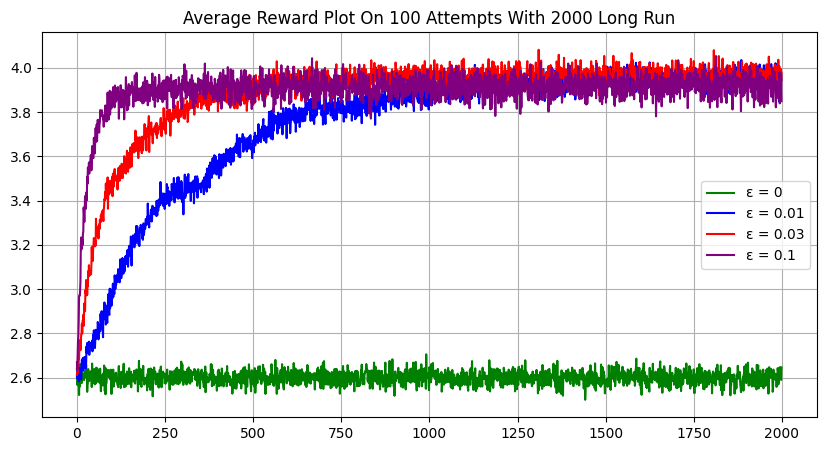

In [25]:
plt.figure(figsize=(10, 5))
plt.title("Average Reward Plot On 100 Attempts With 2000 Long Run")
plt.plot(trial_mean1, color='green')
plt.plot(trial_mean2, color='blue')
plt.plot(trial_mean3, color='red')
plt.plot(trial_mean4, color='purple')
plt.legend(['ε = 0', 'ε = 0.01', 'ε = 0.03', 'ε = 0.1', 'ε = 0.4'])
plt.grid()

By this plot, you can see that as the $\varepsilon$ increases, the expected reward also increases with experience. High $\varepsilon$ value indicates that the agent do more exploration and it will gains more knowledge of the most optimal action should be chosen. Low $\varepsilon$ makes the agent do less exploration and keep exploiting on the same action over time.